In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#visaualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.5)

#metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt


# Support Vector Machine (SVM) Mixed Dataset
## White = 1, Red = 2

In [2]:
wine = pd.read_csv("winequalityN-updated-2.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


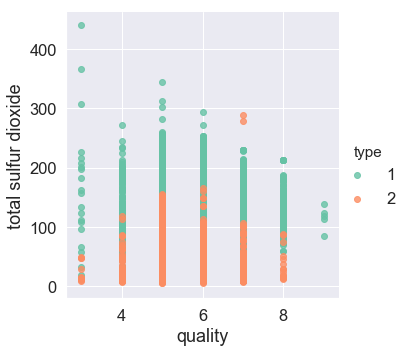

In [3]:
#plotting random two features as a visualization
sns.lmplot ('quality', 'total sulfur dioxide', data = wine, hue = 'type', palette = 'Set2', fit_reg = False )

In [4]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

X,y

(      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
 0        1            7.0             0.270         0.36           20.70   
 1        1            6.3             0.300         0.34            1.60   
 2        1            8.1             0.280         0.40            6.90   
 3        1            7.2             0.230         0.32            8.50   
 4        1            7.2             0.230         0.32            8.50   
 5        1            8.1             0.280         0.40            6.90   
 6        1            6.2             0.320         0.16            7.00   
 7        1            7.0             0.270         0.36           20.70   
 8        1            6.3             0.300         0.34            1.60   
 9        1            8.1             0.220         0.43            1.50   
 10       1            8.1             0.270         0.41            1.45   
 11       1            8.6             0.230         0.40            4.20   

In [5]:
#Splitting the dataset as 2/3 of training and 1/3 of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 6)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4330, 12)
(2133, 12)
(4330,)
(2133,)


In [6]:
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-0.56970526 -0.5563703  -0.48570105 ... -0.85020853 -0.882654
  -0.34319554]
 [-0.56970526 -1.18463562 -0.54665828 ... -0.72579478 -0.20685886
  -0.59518054]
 [ 1.7552936   1.01429301  1.95258832 ... -0.53917415 -0.34201789
  -1.09915053]
 ...
 [-0.56970526  1.32842567 -0.79048722 ... -0.72579478 -0.54475643
  -0.67917554]
 [-0.56970526 -0.00663814 -0.66857275 ... -0.78800165 -0.61233595
  -1.26714052]
 [-0.56970526 -0.63490346 -0.60761552 ... -0.29034664 -0.20685886
  -1.18314552]]


C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [7]:
#Estimation of hyperparameters for SVM using gridsearch with 3 fold cross validation
y = y.values.reshape(-1,1)
y = np.asarray(y, dtype = int)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3) #searching for parameters using 3-fold cross validation
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
list1 = list(grid_search.best_params_.values()) #converting dictionary to list
print(list1)
C_best = list1[0] #storing C parameter calculated using gridsearch
gamma_best = list1[1] #storing gamma parameter calculated using gridsearch
print(C_best)
print(gamma_best)

{'C': 10, 'gamma': 1}
[10, 1]
10
1


In [8]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transformation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
print(y_train)
print(y_test)
print(y_test.shape)
print(y_train.shape)

[[6]
 [6]
 [5]
 ...
 [6]
 [6]
 [5]]
[[6]
 [7]
 [6]
 ...
 [7]
 [6]
 [6]]
(2133, 1)
(4330, 1)


In [9]:
#fitting the model
model = svm.SVC(C = C_best, gamma = gamma_best,kernel='rbf')
model.fit(X_train, y_train)


C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
#finding the predicted values
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[7 6 6 ... 5 7 7]
[[6]
 [7]
 [6]
 ...
 [7]
 [6]
 [6]]


In [11]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

rms = sqrt(mean_squared_error(y_test, y_pred)) #root mean square error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
print(rms)
print(mae)

[[  0   0   5   8   0   0   0]
 [  0   5  34  41   0   0   0]
 [  0   8 469 206  10   0   0]
 [  0   4 170 673  77   2   0]
 [  0   0  21 168 171   9   0]
 [  0   0   0  23  14  14   0]
 [  0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        13
           4       0.29      0.06      0.10        80
           5       0.67      0.68      0.67       693
           6       0.60      0.73      0.66       926
           7       0.63      0.46      0.53       369
           8       0.56      0.27      0.37        51
           9       0.00      0.00      0.00         1

   micro avg       0.62      0.62      0.62      2133
   macro avg       0.39      0.31      0.33      2133
weighted avg       0.61      0.62      0.61      2133

0.6244725738396625
0.747240587145369
0.4336615096108767


C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Support Vector Machine (SVM) Mixed Dataset
## White = 2, Red = 1

In [12]:
wine = pd.read_csv("winequalityN-updated-2-flipped.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


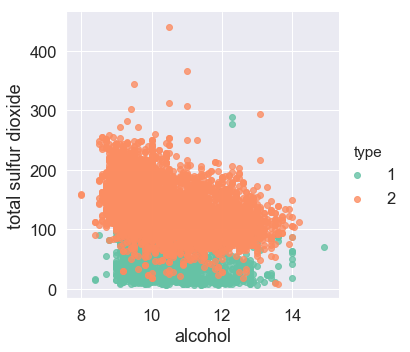

In [13]:
#plotting random two features as a visualization
sns.lmplot ('alcohol', 'total sulfur dioxide', data = wine, hue = 'type', palette = 'Set2', fit_reg = False )

In [14]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

X,y

(      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
 0        2            7.0             0.270         0.36           20.70   
 1        2            6.3             0.300         0.34            1.60   
 2        2            8.1             0.280         0.40            6.90   
 3        2            7.2             0.230         0.32            8.50   
 4        2            7.2             0.230         0.32            8.50   
 5        2            8.1             0.280         0.40            6.90   
 6        2            6.2             0.320         0.16            7.00   
 7        2            7.0             0.270         0.36           20.70   
 8        2            6.3             0.300         0.34            1.60   
 9        2            8.1             0.220         0.43            1.50   
 10       2            8.1             0.270         0.41            1.45   
 11       2            8.6             0.230         0.40            4.20   

In [15]:
#Splitting the dataset as 2/3 of training and 1/3 of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 6)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4330, 12)
(2133, 12)
(4330,)
(2133,)


In [16]:
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[ 0.56970526 -0.5563703  -0.48570105 ... -0.85020853 -0.882654
  -0.34319554]
 [ 0.56970526 -1.18463562 -0.54665828 ... -0.72579478 -0.20685886
  -0.59518054]
 [-1.7552936   1.01429301  1.95258832 ... -0.53917415 -0.34201789
  -1.09915053]
 ...
 [ 0.56970526  1.32842567 -0.79048722 ... -0.72579478 -0.54475643
  -0.67917554]
 [ 0.56970526 -0.00663814 -0.66857275 ... -0.78800165 -0.61233595
  -1.26714052]
 [ 0.56970526 -0.63490346 -0.60761552 ... -0.29034664 -0.20685886
  -1.18314552]]


C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [17]:
#Estimation of hyperparameters for SVM using gridsearch with 3 fold cross validation
y = y.values.reshape(-1,1)
y = np.asarray(y, dtype = int)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3) #searching for parameters using 3-fold cross validation
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
list2 = list(grid_search.best_params_.values()) #converting dictionary to list
print(list2)
C_best = list2[0] #storing C parameter calculated using gridsearch
gamma_best = list2[1] #storing gamma parameter calculated using gridsearch
print(C_best)
print(gamma_best)

{'C': 10, 'gamma': 1}
[10, 1]
10
1


In [18]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transofmation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
print(y_train)
print(y_test)
print(y_test.shape)
print(y_train.shape)

[[6]
 [6]
 [5]
 ...
 [6]
 [6]
 [5]]
[[6]
 [7]
 [6]
 ...
 [7]
 [6]
 [6]]
(2133, 1)
(4330, 1)


In [19]:
#fitting the model
model = svm.SVC(C = C_best, gamma = gamma_best,kernel='rbf')
model.fit(X_train, y_train)

C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
#finding the predicted values
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[7 6 6 ... 5 7 7]
[[6]
 [7]
 [6]
 ...
 [7]
 [6]
 [6]]


In [21]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

rms = sqrt(mean_squared_error(y_test, y_pred)) #root mean square error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
print(rms)
print(mae)

[[  0   0   5   8   0   0   0]
 [  0   5  34  41   0   0   0]
 [  0   8 469 206  10   0   0]
 [  0   4 170 673  77   2   0]
 [  0   0  21 168 171   9   0]
 [  0   0   0  23  14  14   0]
 [  0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        13
           4       0.29      0.06      0.10        80
           5       0.67      0.68      0.67       693
           6       0.60      0.73      0.66       926
           7       0.63      0.46      0.53       369
           8       0.56      0.27      0.37        51
           9       0.00      0.00      0.00         1

   micro avg       0.62      0.62      0.62      2133
   macro avg       0.39      0.31      0.33      2133
weighted avg       0.61      0.62      0.61      2133

0.6244725738396625
0.747240587145369
0.4336615096108767


C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Support Vector Machine (SVM) White Wine Dataset


In [22]:
wine = pd.read_csv("winequalityN-white.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


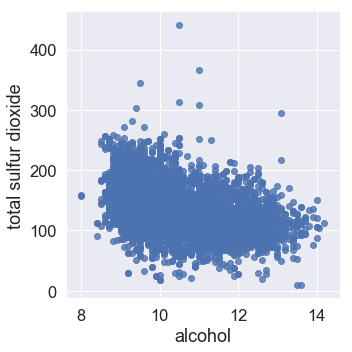

In [23]:
#plotting random two features as a visualization
sns.lmplot ('alcohol', 'total sulfur dioxide', data = wine, palette = 'Set2', fit_reg = False )


In [24]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

X,y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.0             0.270         0.36           20.70      0.045   
 1               6.3             0.300         0.34            1.60      0.049   
 2               8.1             0.280         0.40            6.90      0.050   
 3               7.2             0.230         0.32            8.50      0.058   
 4               7.2             0.230         0.32            8.50      0.058   
 5               8.1             0.280         0.40            6.90      0.050   
 6               6.2             0.320         0.16            7.00      0.045   
 7               7.0             0.270         0.36           20.70      0.045   
 8               6.3             0.300         0.34            1.60      0.049   
 9               8.1             0.220         0.43            1.50      0.044   
 10              8.1             0.270         0.41            1.45      0.033   
 11             

In [25]:
#Splitting the dataset as 2/3 of training and 1/3 of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 6)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3262, 11)
(1608, 11)
(3262,)
(1608,)


In [26]:
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-0.07605227 -0.28247526 -1.27489257 ... -0.51570347 -0.60728395
  -0.83897932]
 [-1.60924571 -0.67698821 -0.69753597 ...  0.8348844   0.61504596
   0.61528651]
 [ 1.10332731  0.21066592  0.53965673 ... -0.31311529 -0.86921179
   0.29211632]
 ...
 [ 2.40064484 -0.67698821  0.04477965 ... -0.58323287 -0.34535611
  -0.67739423]
 [ 0.39569956 -0.47973174  0.3746977  ... -0.65076226 -0.43266539
  -1.24294205]
 [-0.5478041  -0.3811035  -0.69753597 ... -0.11052711  0.09119029
  -1.1621495 ]]


In [27]:
#Estimation of hyperparameters for SVM using gridsearch with 3 fold cross validation
y = y.values.reshape(-1,1)
y = np.asarray(y, dtype = int)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3) #searching for parameters using 3-fold cross validation
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
list3 = list(grid_search.best_params_.values()) #converting dictionary to list
print(list3)
C_best = list3[0] #storing C parameter calculated using gridsearch
gamma_best = list3[1] #storing gamma parameter calculated using gridsearch
print(C_best)
print(gamma_best)

{'C': 10, 'gamma': 1}
[10, 1]
10
1


In [28]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transofmation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
print(y_train)
print(y_test)
print(y_test.shape)
print(y_train.shape)

[[5]
 [6]
 [7]
 ...
 [6]
 [6]
 [5]]
[[6]
 [7]
 [6]
 ...
 [7]
 [6]
 [7]]
(1608, 1)
(3262, 1)


In [29]:
#fitting the model
model = svm.SVC(C = C_best, gamma = gamma_best,kernel='rbf')
model.fit(X_train, y_train)

C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
#finding the predicted values
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[5 6 6 ... 6 6 6]
[[6]
 [7]
 [6]
 ...
 [7]
 [6]
 [7]]


In [31]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

rms = sqrt(mean_squared_error(y_test, y_pred)) #root mean square error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
print(rms)
print(mae)

[[  0   0   1   7   0   0   0]
 [  0   6  12  32   0   0   0]
 [  0   4 312 168   6   0   0]
 [  0   3  90 604  31   5   0]
 [  0   0   7 120 142   1   0]
 [  0   0   2  25   8  21   0]
 [  0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.46      0.12      0.19        50
           5       0.74      0.64      0.68       490
           6       0.63      0.82      0.71       733
           7       0.76      0.53      0.62       270
           8       0.78      0.38      0.51        56
           9       0.00      0.00      0.00         1

   micro avg       0.67      0.67      0.67      1608
   macro avg       0.48      0.35      0.39      1608
weighted avg       0.68      0.67      0.66      1608

0.6747512437810945
0.7227641798688508
0.38681592039800994


C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Support Vector Machine (SVM) Red Wine Dataset


In [32]:
wine = pd.read_csv("winequalityN-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


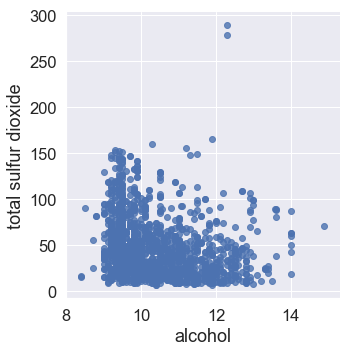

In [33]:
#plotting random two features as a visualization
sns.lmplot ('alcohol', 'total sulfur dioxide', data = wine, palette = 'Set2', fit_reg = False )

In [34]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

X,y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 5               7.4             0.660         0.00             1.8      0.075   
 6               7.9             0.600         0.06             1.6      0.069   
 7               7.3             0.650         0.00             1.2      0.065   
 8               7.8             0.580         0.02             2.0      0.073   
 9               7.5             0.500         0.36             6.1      0.071   
 10              6.7             0.580         0.08             1.8      0.097   
 11             

In [35]:
#Splitting the dataset as 2/3 of training and 1/3 of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 6)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1067, 11)
(526, 11)
(1067,)
(526,)


In [36]:
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[ 1.99852701  0.29180174  1.55379377 ... -1.39207267 -0.18630131
  -0.41473156]
 [ 0.36586283  1.61894123 -1.13924875 ...  0.33596169 -0.76332161
  -0.41473156]
 [-1.21050259  0.67888409 -1.08843663 ...  1.67998842 -0.70561958
   1.3797601 ]
 ...
 [ 0.36586283  1.61894123 -0.68193965 ...  0.52796551 -0.18630131
  -0.59878199]
 [-0.19712482 -0.53766044  0.43592706 ...  0.20795915 -1.16723582
  -0.96688284]
 [-0.64751494  0.07061182 -0.02138205 ...  0.52796551  0.27531493
   0.50552057]]


In [37]:
#Estimation of hyperparameters for SVM using gridsearch with 3 fold cross validation
y = y.values.reshape(-1,1)
y = np.asarray(y, dtype = int)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3) #searching for parameters using 3-fold cross validation
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
list4 = list(grid_search.best_params_.values()) #converting dictionary to list
print(list4)
C_best = list4[0] #storing C parameter calculated using gridsearch
gamma_best = list4[1] #storing gamma parameter calculated using gridsearch
print(C_best)
print(gamma_best)

{'C': 1, 'gamma': 1}
[1, 1]
1
1


In [38]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transofmation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
print(y_train)
print(y_test)
print(y_test.shape)
print(y_train.shape)

[[6]
 [5]
 [5]
 ...
 [5]
 [5]
 [5]]
[[6]
 [6]
 [6]
 [4]
 [5]
 [5]
 [5]
 [8]
 [5]
 [5]
 [7]
 [6]
 [5]
 [5]
 [5]
 [5]
 [6]
 [6]
 [7]
 [7]
 [6]
 [7]
 [7]
 [6]
 [6]
 [5]
 [5]
 [5]
 [5]
 [5]
 [6]
 [6]
 [5]
 [5]
 [5]
 [5]
 [6]
 [6]
 [5]
 [6]
 [7]
 [6]
 [6]
 [6]
 [8]
 [5]
 [6]
 [6]
 [7]
 [5]
 [5]
 [6]
 [6]
 [5]
 [5]
 [5]
 [5]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [5]
 [6]
 [7]
 [5]
 [5]
 [5]
 [6]
 [7]
 [7]
 [6]
 [6]
 [5]
 [5]
 [6]
 [6]
 [6]
 [7]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [7]
 [6]
 [7]
 [7]
 [6]
 [6]
 [6]
 [6]
 [5]
 [5]
 [6]
 [6]
 [6]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [5]
 [5]
 [7]
 [5]
 [6]
 [5]
 [6]
 [5]
 [5]
 [6]
 [7]
 [6]
 [5]
 [5]
 [6]
 [6]
 [5]
 [5]
 [6]
 [6]
 [6]
 [7]
 [5]
 [6]
 [5]
 [6]
 [5]
 [6]
 [5]
 [6]
 [6]
 [5]
 [6]
 [7]
 [6]
 [7]
 [6]
 [5]
 [5]
 [6]
 [5]
 [6]
 [6]
 [6]
 [7]
 [6]
 [6]
 [6]
 [7]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [5]
 [7]
 [7]
 [6]
 [6]
 [5]
 [7]
 [6]
 [4]
 [6]
 [5]
 [5]
 [6]
 [5]
 [5]
 [6]
 [7]
 [7]
 [5]
 [7]
 [4]
 [4]
 [5]
 [5]
 [6]
 [6]

In [39]:
#fitting the model
model = svm.SVC(C = C_best, gamma = gamma_best,kernel='rbf')
model.fit(X_train, y_train)

C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
#finding the predicted values
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[7 6 5 5 5 5 5 6 5 5 7 6 5 5 5 5 5 6 6 6 5 7 7 5 5 5 6 5 7 5 6 6 5 6 5 5 5
 5 5 6 6 5 6 6 5 6 5 6 6 5 6 6 5 6 5 5 5 6 6 5 5 5 5 5 6 7 5 5 5 6 6 7 6 6
 5 5 5 6 6 5 5 5 5 5 6 6 7 6 6 6 5 6 6 5 5 5 5 6 6 5 6 5 5 5 6 5 5 6 6 6 6
 5 5 5 6 7 6 6 5 6 6 6 6 5 5 6 5 5 6 5 6 5 5 5 6 6 5 6 6 7 6 6 5 5 6 5 5 6
 6 6 6 6 6 6 6 6 5 5 5 5 6 5 5 5 6 6 6 5 6 6 5 5 5 6 5 6 6 5 5 5 5 5 6 7 7
 5 6 6 5 5 5 6 6 5 5 5 5 5 5 7 6 5 5 6 5 6 5 5 5 5 6 6 7 6 6 5 6 6 6 5 6 6
 6 5 7 5 6 6 5 5 5 5 6 5 5 5 5 7 5 5 5 7 5 5 5 6 6 6 6 6 6 5 5 6 6 5 6 5 6
 5 5 6 5 5 5 5 5 6 6 5 5 5 5 5 6 5 5 5 7 5 6 5 5 6 5 6 6 5 5 6 5 5 5 5 5 5
 5 6 6 5 5 5 5 6 5 5 5 5 5 6 5 5 5 6 7 6 6 5 6 6 5 6 6 5 6 6 6 5 5 5 5 6 5
 6 6 5 6 5 6 5 6 6 5 5 5 7 5 5 6 6 5 5 6 6 6 6 5 5 5 5 6 6 5 5 6 6 5 6 5 6
 6 6 6 5 6 5 6 5 5 5 5 5 5 6 7 6 5 6 6 5 6 6 5 6 5 5 5 6 6 5 5 6 6 5 5 6 5
 6 5 6 7 5 5 7 5 7 5 5 5 6 7 6 6 6 5 5 6 5 6 5 6 5 6 6 6 5 7 5 5 6 5 5 5 5
 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 6 6 5 5 5 5 7 7 5 6 5 6 5 5 5 6 6
 6 6 5 5 5 5 6 5 6 5 5 5 

In [41]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

rms = sqrt(mean_squared_error(y_test, y_pred)) #root mean square error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
print(rms)
print(mae)

[[  0   0   4   2   0   0]
 [  0   0  10   7   0   0]
 [  0   0 193  34   1   0]
 [  0   0  73 132   4   0]
 [  0   0   5  32  23   0]
 [  0   0   1   3   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        17
           5       0.67      0.85      0.75       228
           6       0.63      0.63      0.63       209
           7       0.77      0.38      0.51        60
           8       0.00      0.00      0.00         6

   micro avg       0.66      0.66      0.66       526
   macro avg       0.35      0.31      0.32       526
weighted avg       0.63      0.66      0.63       526

0.6615969581749049
0.7057611914207166
0.38783269961977185


C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
